1. Data Ingesiton

2. Eda of the data

3. processing of the data

4. model building

5. model evalution

# Data Ingestion

Import the Required Libraries: Import the required libraries such as pandas, numpy, matplotlib, seaborn, etc.

Load the Data.

Load the Time Series Data into a pandas dataframe.

Set the datetime column as the index of the dataframe.

Check the datatype of the index and convert it to datetime if necessary.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [2]:
from google.colab import files
files.upload()

Saving TSLA.CSV to TSLA.CSV


{'TSLA.CSV': b'Date,Open,High,Low,Close,Volume,Dividends,Stock Splits\r\n2019-05-21,39.551998138427734,41.47999954223633,39.20800018310547,41.01599884033203,90019500,0,0.0\r\n2019-05-22,39.81999969482422,40.78799819946289,38.35599899291992,38.54600143432617,93426000,0,0.0\r\n2019-05-23,38.86800003051758,39.89400100708008,37.24399948120117,39.097999572753906,132735500,0,0.0\r\n2019-05-24,39.965999603271484,39.99599838256836,37.75,38.125999450683594,70683000,0,0.0\r\n2019-05-28,38.2400016784668,39.0,37.56999969482422,37.7400016784668,51564500,0,0.0\r\n2019-05-29,37.41999816894531,38.47800064086914,37.007999420166016,37.97200012207031,59843000,0,0.0\r\n2019-05-30,37.75,38.45199966430664,37.40399932861328,37.64400100708008,39632500,0,0.0\r\n2019-05-31,37.02000045776367,37.98400115966797,36.81999969482422,37.03200149536133,52033500,0,0.0\r\n2019-06-03,37.10200119018555,37.33599853515625,35.39799880981445,35.79399871826172,65322000,0,0.0\r\n2019-06-04,36.220001220703125,38.79600143432617,35.

In [3]:
data=pd.read_csv("TSLA.CSV")
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [4]:
#univarite timeseries
stock_data=data[["Date","Close"]]
stock_data.head(7)

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002
5,2019-05-29,37.972000
6,2019-05-30,37.644001


In [5]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [6]:
#Here the date is of object/string type so we convert it to date type
stock_data["Date"]=pd.to_datetime(stock_data["Date"])

<ipython-input-6-256414ea4bc1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data["Date"]=pd.to_datetime(stock_data["Date"])


In [7]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [8]:
stock_data.head(7)

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002
5,2019-05-29,37.972000
6,2019-05-30,37.644001


In [9]:
#We set the date as index
stock_data=stock_data.set_index("Date")

In [10]:
stock_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


In [11]:
stock_data.head(5)

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002


# Why we are converting date column as a index column

1. We can easily retrive the data
2. Visulization is also simple
3. Those lib has been design in such a way it required date column as a index(scipy statsmodel)

# EDA(Exploratory Data Analysis)

1. Summary Statistics
- Compute summary statistics such as mean, median, mode, standard deviation, to get an overview of the data.


2. Visualize the Time Series Data
- Plot the Time Series data
- Plot the rolling mean and rolling standard deviation of the Time Series data.
- Decompose the Time Series Data check for any trends, seasonality, and Noise.
- Plot the decomposed components to get a better understanding of the Time Series data.


3. Stationarity Check
- Check for stationarity.
- Check for stationarity of the Time Series data using the Augmented Dickey-Fuller test.


4. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.


5. Outlier Detection
- Detect and handle outliers using statistical methods or machine learning techniques.

6. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.


In [12]:
#Gets the statistical data
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


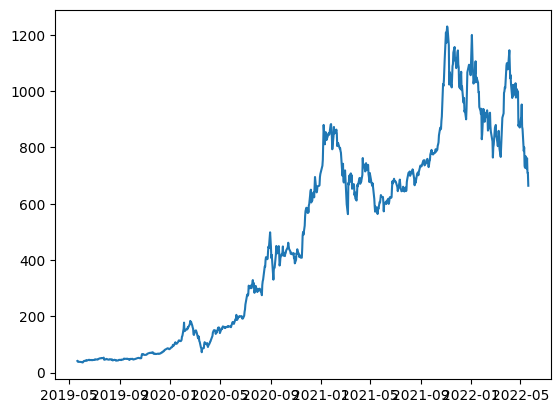

In [13]:
plt.plot(stock_data.Close)

(array([228.,  57.,  38.,  59.,  50., 127.,  81.,  44.,  59.,  15.]),
 array([  35.79399872,  155.20560226,  274.61720581,  394.02880936,
         513.4404129 ,  632.85201645,  752.26362   ,  871.67522354,
         991.08682709, 1110.49843063, 1229.91003418]),
 <BarContainer object of 10 artists>)

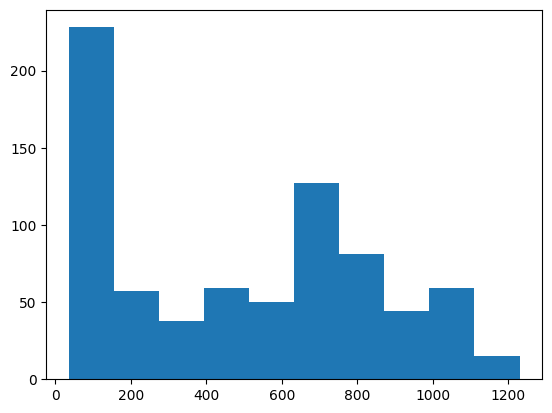

In [14]:
plt.hist(stock_data.Close)

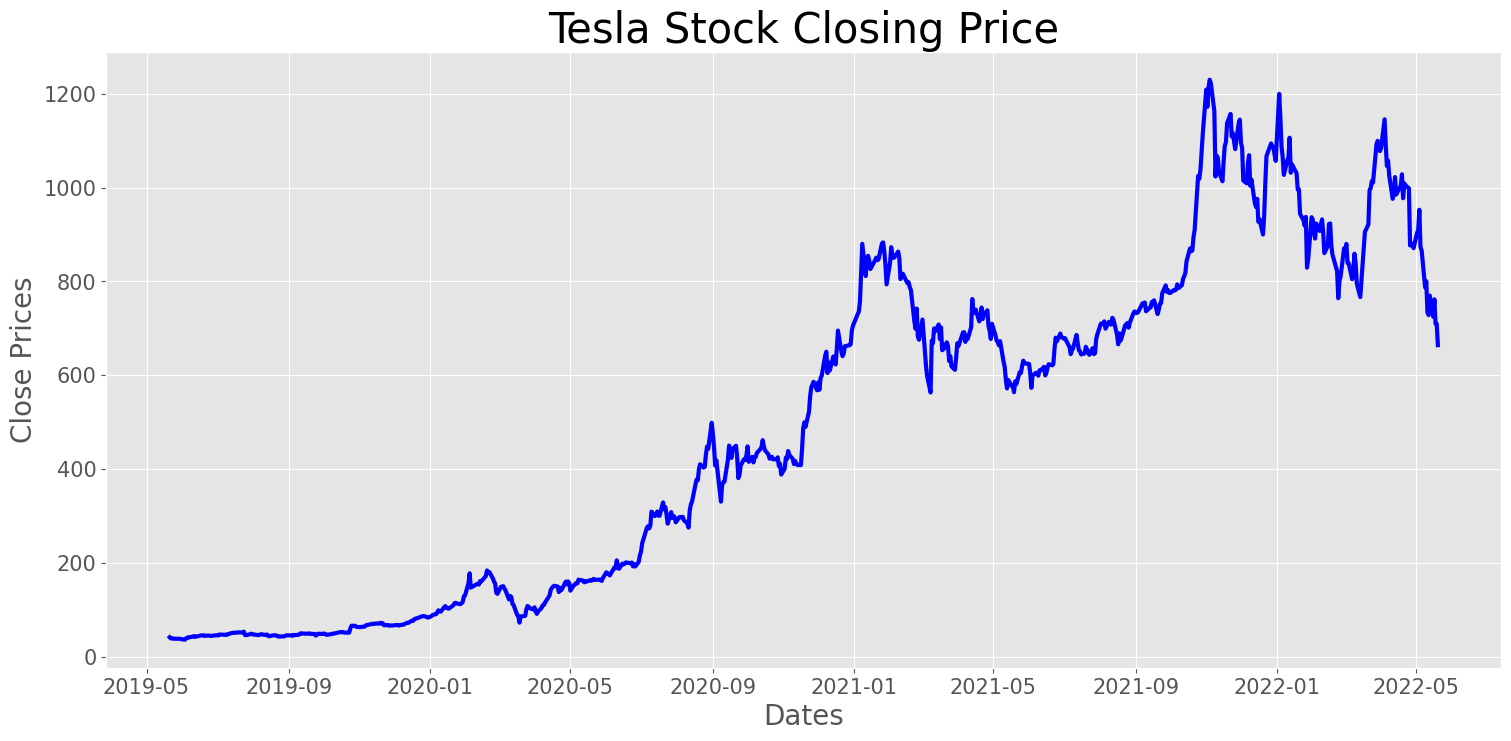

In [15]:
# plotting close price
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15)
plt.plot(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

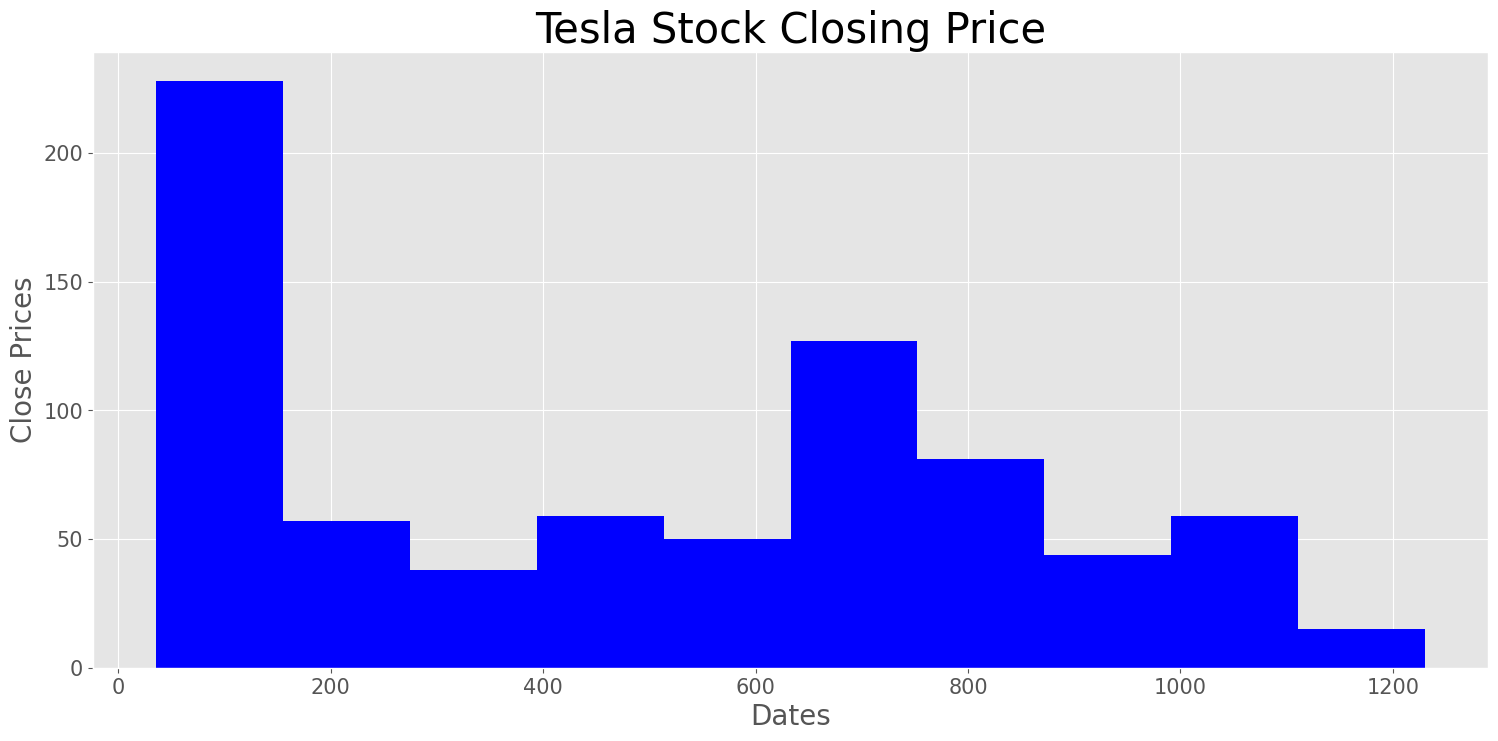

In [16]:
# plotting close price
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15)
plt.hist(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

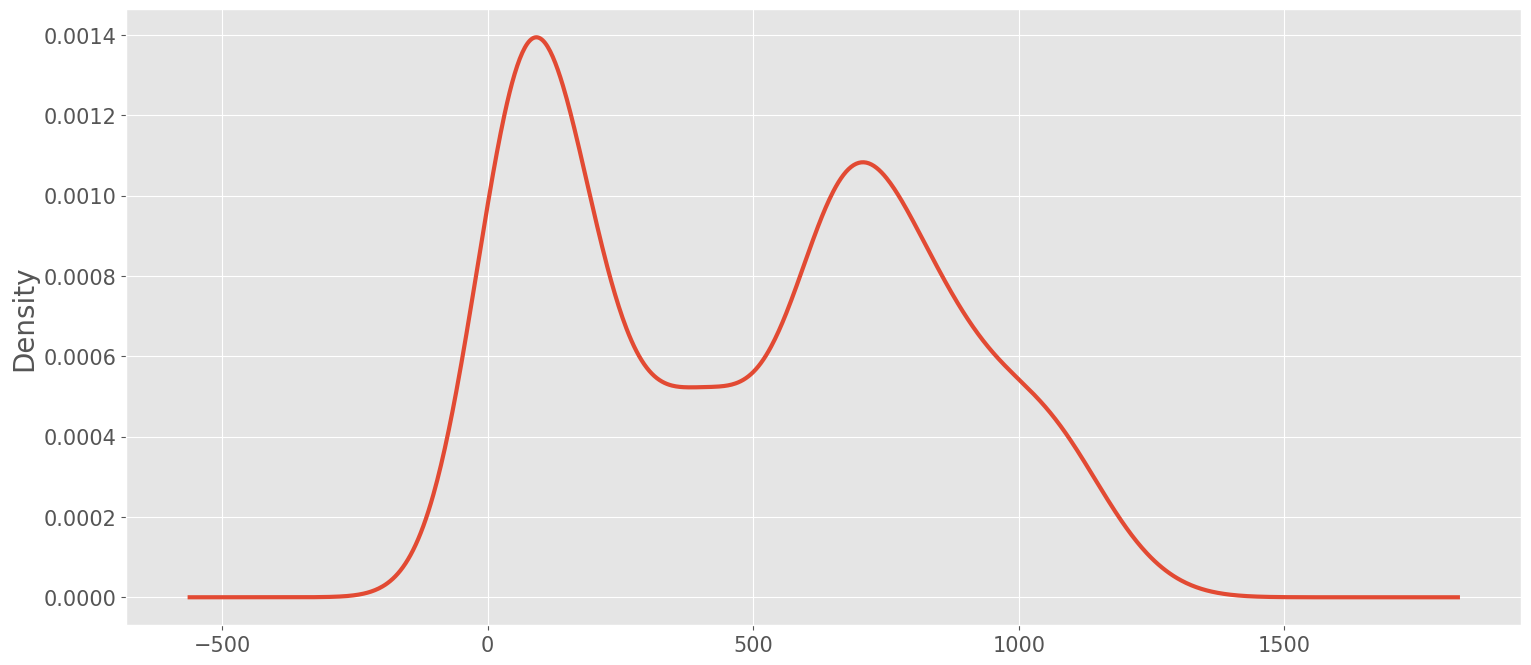

In [17]:
# Distribution of the close price
df_close = stock_data['Close']
df_close.plot(kind='kde',figsize = (18,8), linewidth= 3)
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

In [18]:
#Moving average for over 48 days window size
rolmean=stock_data["Close"].rolling(48).mean()

In [19]:
rolstd=stock_data["Close"].rolling(48).std()

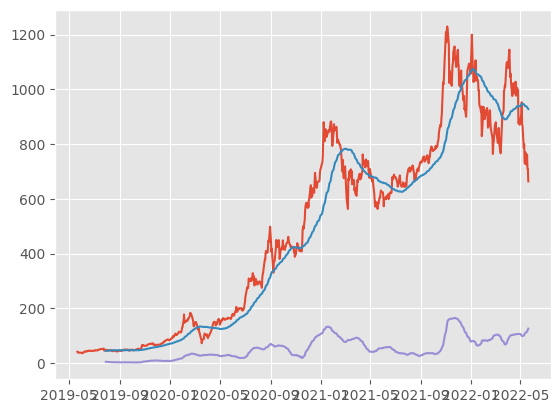

In [20]:
#For checking is my Time Series Stationary or Non-Stationary
#1. Visulaization
plt.plot(stock_data.Close)
plt.plot(rolmean)
plt.plot(rolstd)

In [21]:
#2. ADF(ada fullar test)-Augumented Dickey Fullar Test
from statsmodels.tsa.stattools import adfuller
adft=adfuller(stock_data["Close"])

In [22]:
adft

(-1.3630085817037492,
 0.5998762543050696,
 9,
 748,
 {'1%': -3.43912257105195,
  '5%': -2.8654117005229844,
  '10%': -2.568831705010152},
 6794.359259220987)

In [23]:
pd.Series(adft[0:4],index=["test stats","p-value","lag","data points"])

test stats      -1.363009
p-value          0.599876
lag              9.000000
data points    748.000000
dtype: float64

If p=<0.05 then we reject Null Hypothesis else we accept Null Hypothesis and the data is Non-Stationary as this can be seen by the Visualization

In [24]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)

    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)


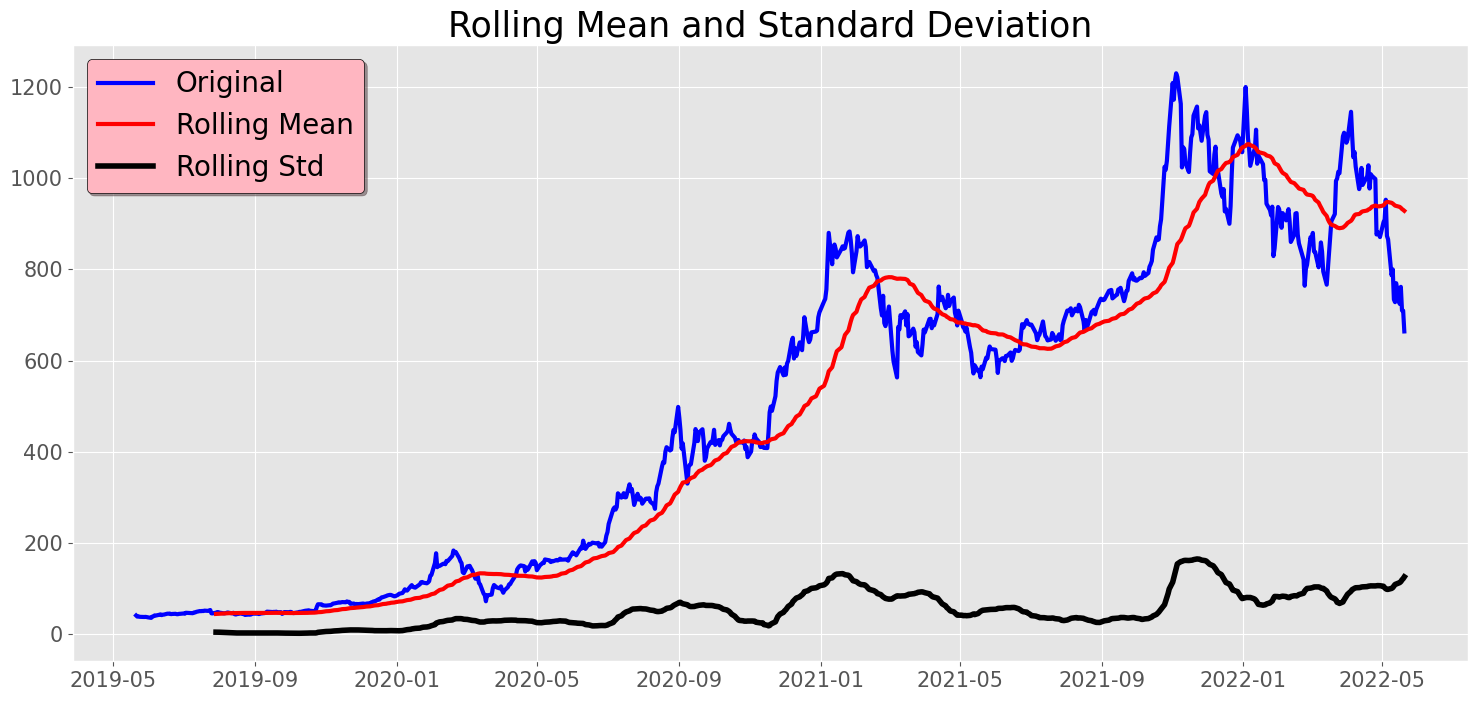

Results of dickey fuller test
Test Statistics                 -1.363009
p-value                          0.599876
No. of lags used                 9.000000
Number of observations used    748.000000
critical value (1%)             -3.439123
critical value (5%)             -2.865412
critical value (10%)            -2.568832
dtype: float64


In [25]:
test_stationarity(stock_data.Close)

In [26]:
#Decompose the data into different components like Trend, Season, Cycle, Noise
#By default it is additive model you can choose multiplicative also
#Additive = Trend + Season + Noise
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(stock_data[["Close"]],period=12)

In [27]:
result.seasonal

Date
2019-05-21   -2.346452
2019-05-22    3.768884
2019-05-23   -0.777006
2019-05-24   -0.654226
2019-05-28   -2.737845
                ...   
2022-05-16    2.149519
2022-05-17    1.323680
2022-05-18    1.837638
2022-05-19   -2.346452
2022-05-20    3.768884
Name: seasonal, Length: 758, dtype: float64

<Figure size 2000x1000 with 0 Axes>

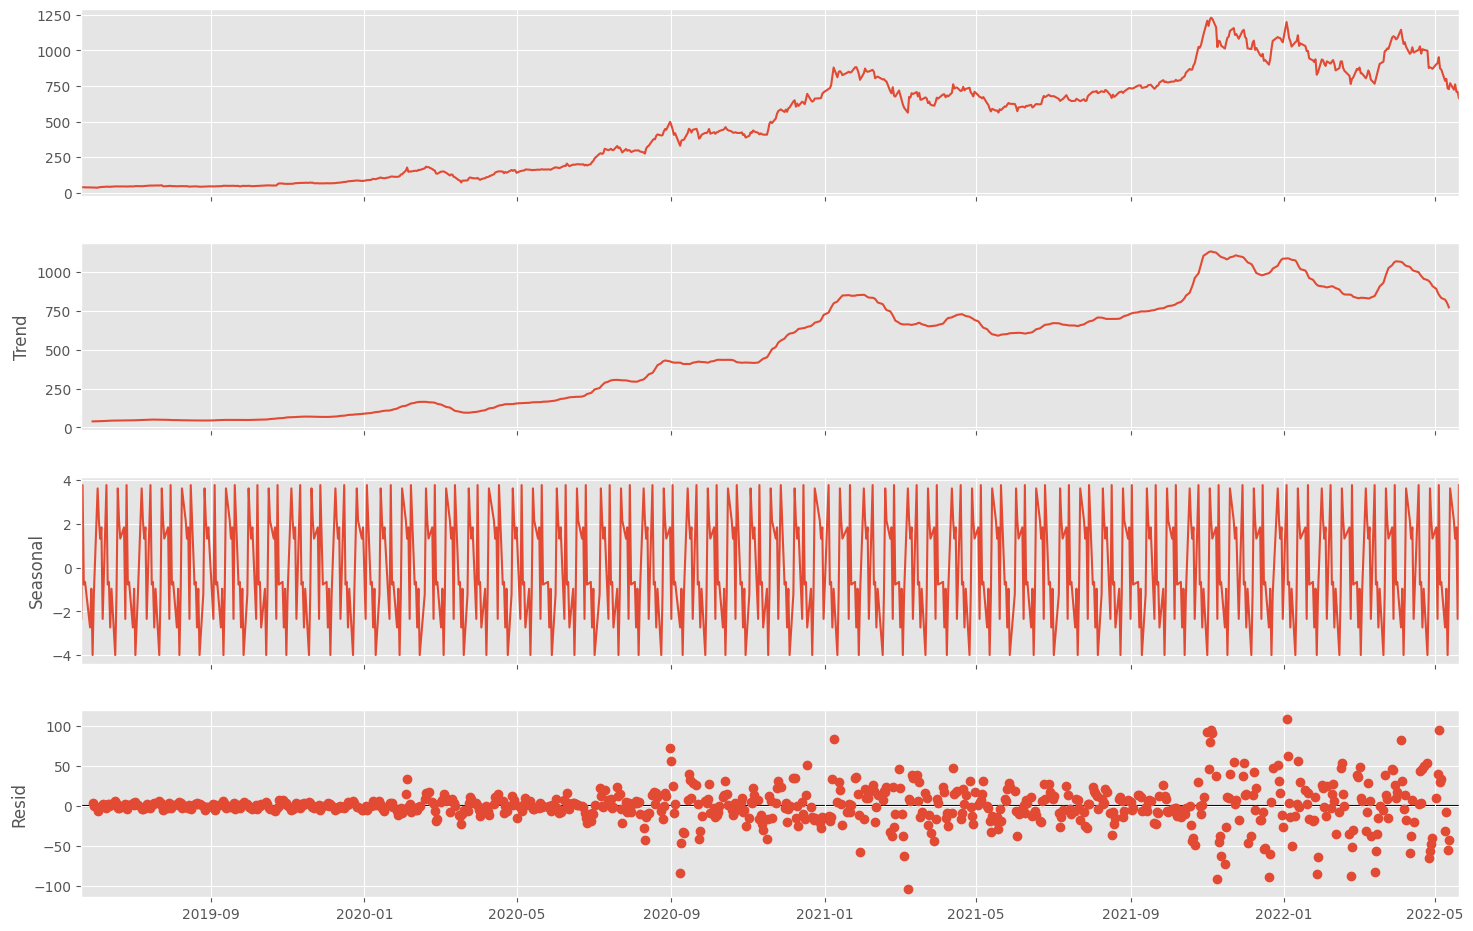

In [28]:
fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

In [29]:
#Multiplicative = Trend * Season * Noise
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(stock_data[["Close"]],period=12,model="multiplicative")


<Figure size 2000x1000 with 0 Axes>

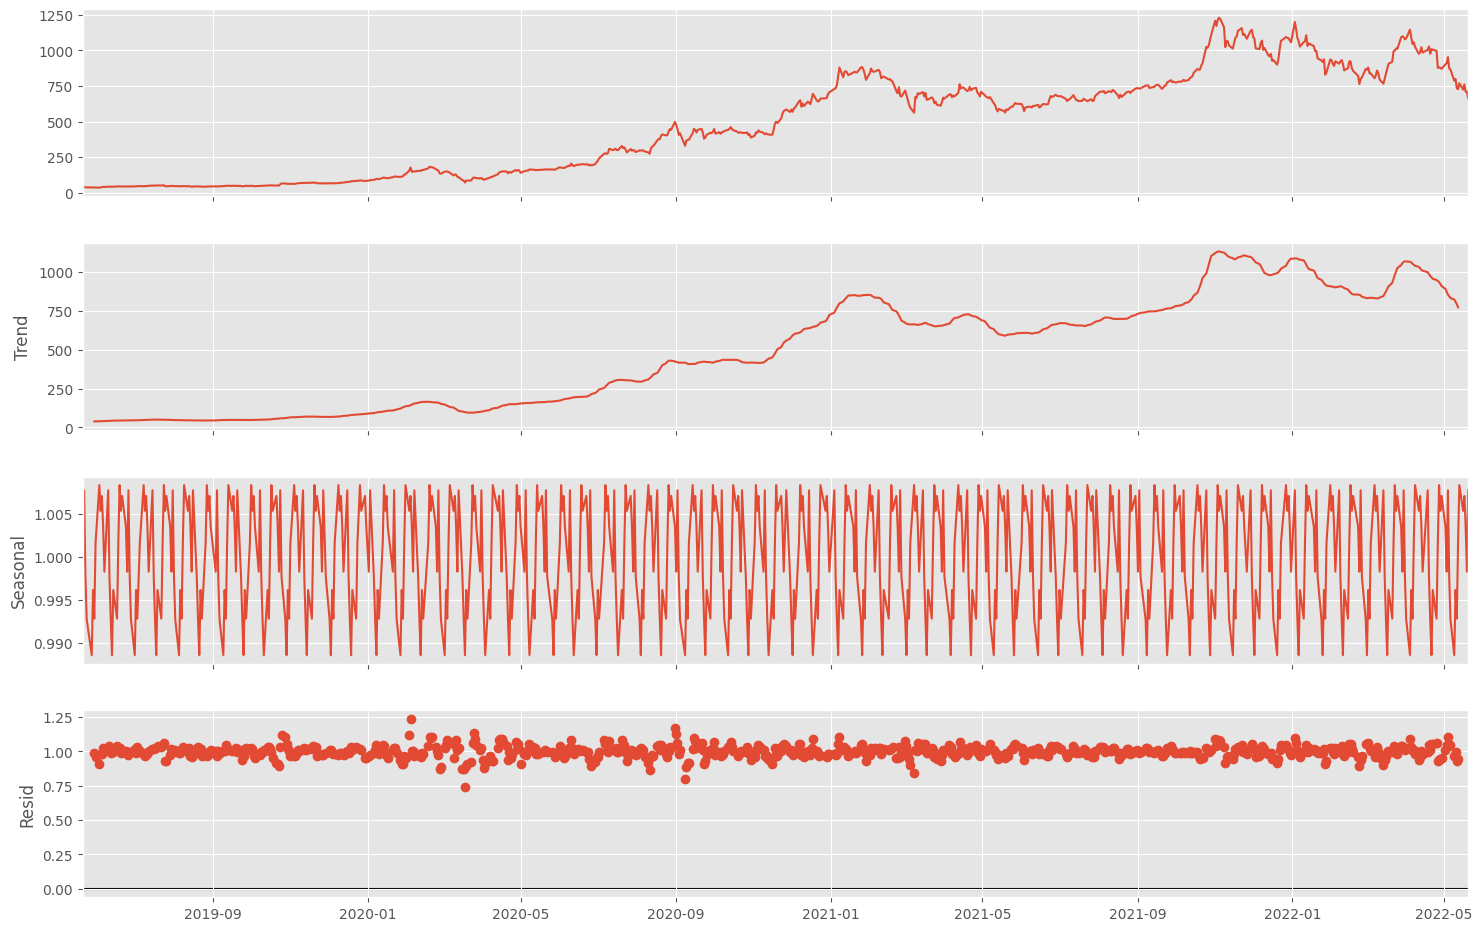

In [30]:
fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

<Axes: >

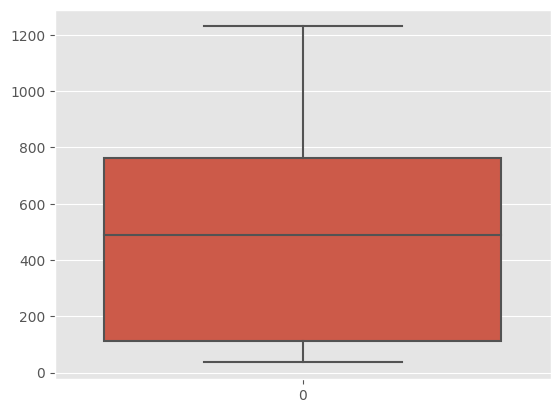

In [31]:
#To check if their is outlier present or not
import seaborn as sns
sns.boxplot(stock_data.Close)

There is no such outlier as proven by the box plot

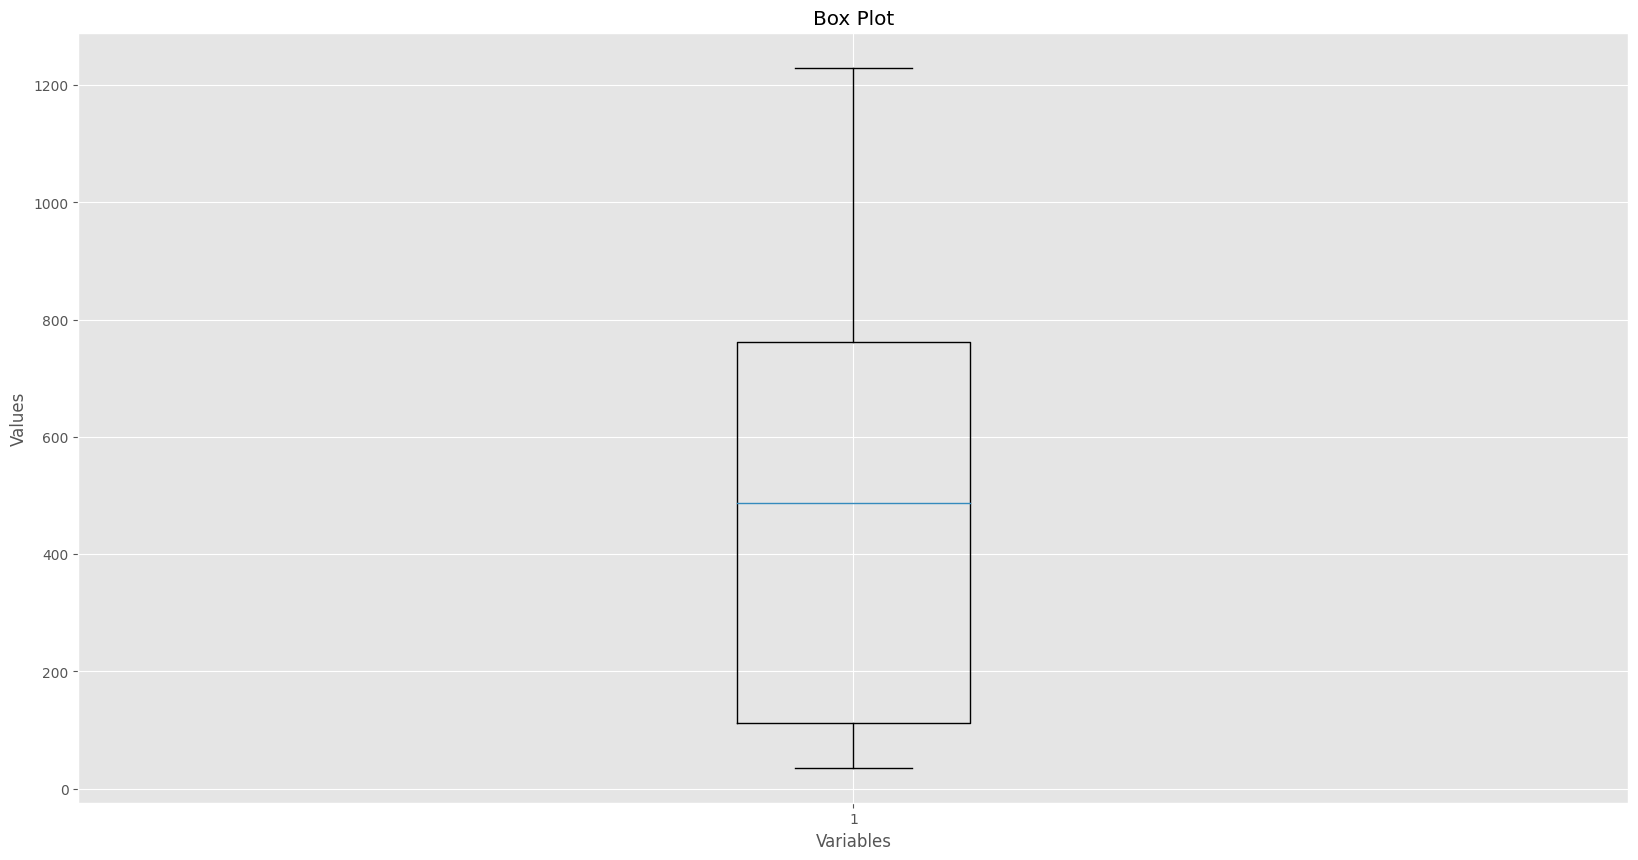

In [32]:
fig, ax = plt.subplots(figsize=(20,10))
#Plot the box plot
ax.boxplot(stock_data["Close"])
#Set the x-axis label
ax.set_xlabel("Variables")
#Set the y-axis label
ax.set_ylabel("Values")
#Set the title
ax.set_title("Box Plot")
#Show the plot
plt.show()

##ACF And PACF
1. ACF - Auto Correlation Function - It measures the correlation b/w time series and it's lag values.
2. PACF - Partial Auto Correlation Function

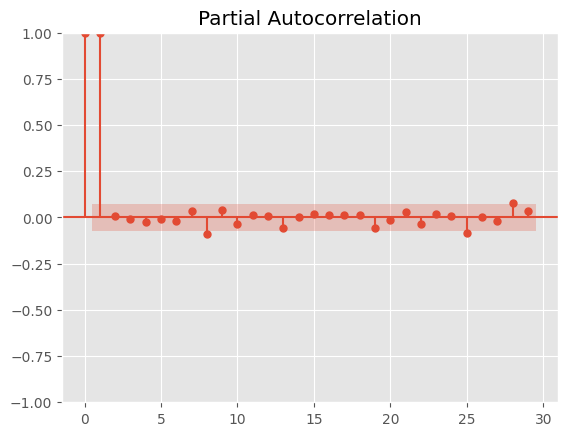

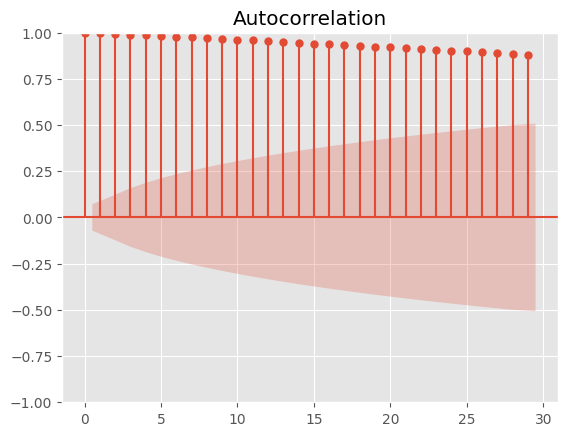

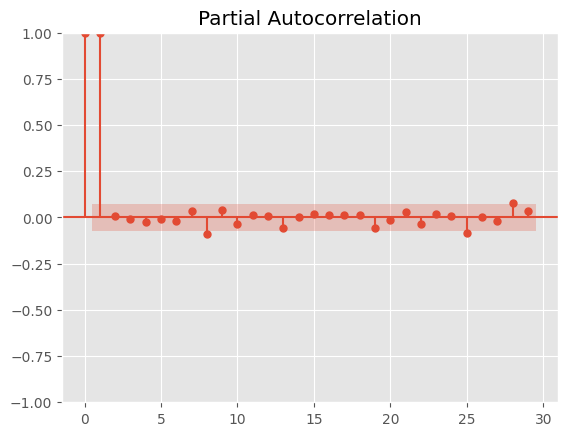

In [33]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(stock_data.Close)
plot_pacf(stock_data.Close)

The Time Series have same correlation because it is Non-Stationary, we will convert it into ST then see the effect by removing the intermediate effect

##Preprocessing of the data
1. Fill the missing values(here not required)
2. Convert data into the Stationary Time Series
3. If necessary then normalize the data(here not required)
4. Split the data into train and test
5. Clean the data by removing the outlier(here not required)

In [34]:
stock_data.Close

Date
2019-05-21     41.015999
2019-05-22     38.546001
2019-05-23     39.098000
2019-05-24     38.125999
2019-05-28     37.740002
                 ...    
2022-05-16    724.369995
2022-05-17    761.609985
2022-05-18    709.809998
2022-05-19    709.419983
2022-05-20    663.900024
Name: Close, Length: 758, dtype: float64

In [35]:
df_close = stock_data["Close"]
df_close

Date
2019-05-21     41.015999
2019-05-22     38.546001
2019-05-23     39.098000
2019-05-24     38.125999
2019-05-28     37.740002
                 ...    
2022-05-16    724.369995
2022-05-17    761.609985
2022-05-18    709.809998
2022-05-19    709.419983
2022-05-20    663.900024
Name: Close, Length: 758, dtype: float64

In [36]:
#We do differencing of the data ie. D2-D1, D3-D2,.....Dn-Dn-1
df_close=df_close.diff()
#We can do for 2 differencing also by just passing 2 in the argument
#As we know that the first row will have NA value (b'coz 1st row value won't get subtracted by any previous value), so we drop that row having na value
df_close=df_close.dropna()


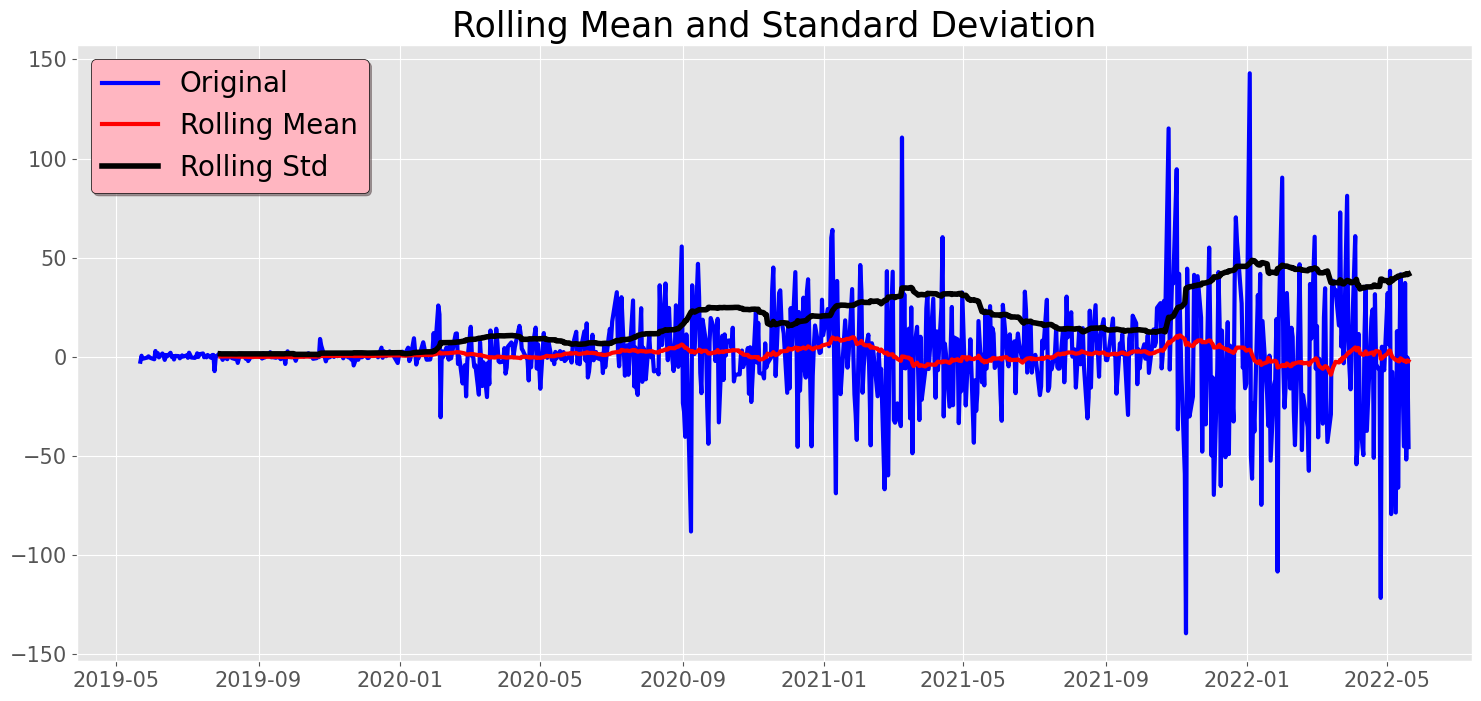

Results of dickey fuller test
Test Statistics               -8.324564e+00
p-value                        3.498786e-13
No. of lags used               8.000000e+00
Number of observations used    7.480000e+02
critical value (1%)           -3.439123e+00
critical value (5%)           -2.865412e+00
critical value (10%)          -2.568832e+00
dtype: float64


In [37]:
#We check whether the Time Series is Stationary or not
test_stationarity(df_close)

The p value is also around 0 and by visualization we can also see that now it is Stationary

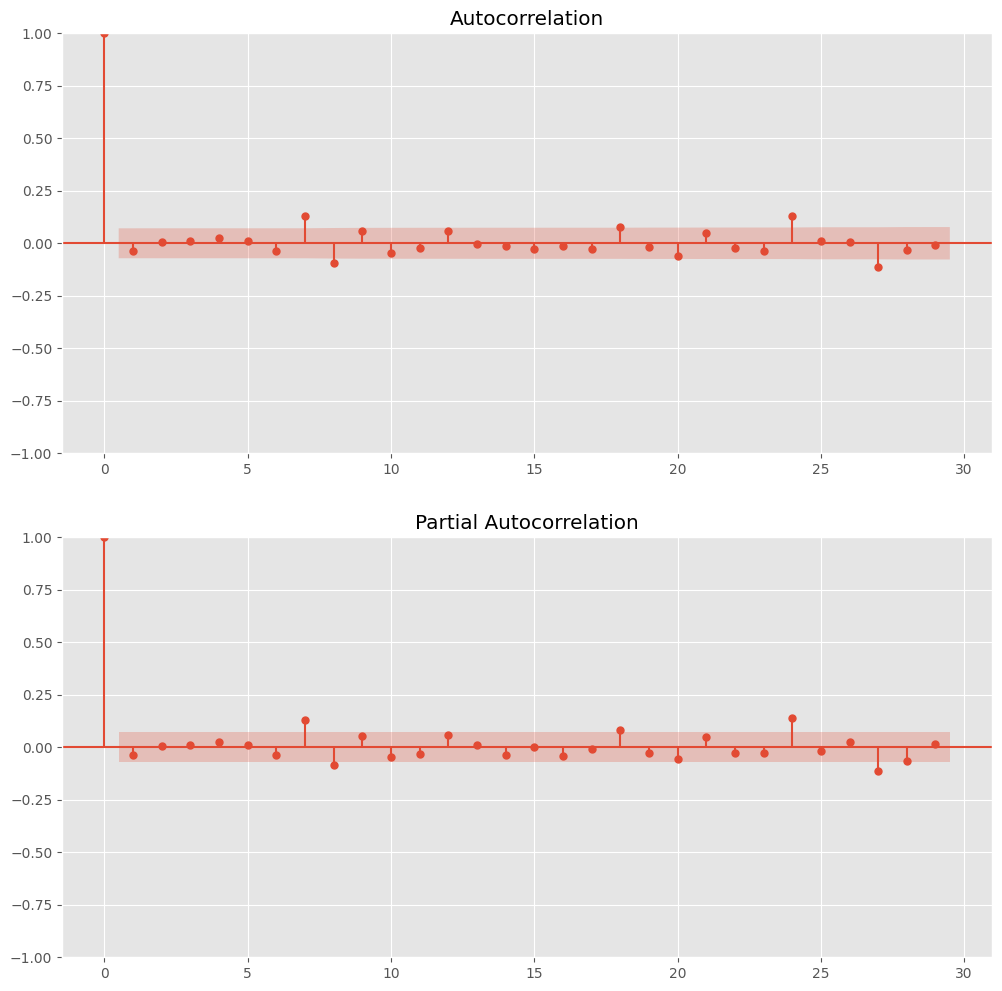

In [38]:
#Now check ACF and PACF
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(211)#function
fig = plot_acf(df_close, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df_close, ax=ax2)

Train Test Split

In [39]:
#All values except last 60 b'coz that will be used for test data
df_close[0:-60] #Will take as training data

Date
2019-05-22    -2.469997
2019-05-23     0.551998
2019-05-24    -0.972000
2019-05-28    -0.385998
2019-05-29     0.231998
                ...    
2022-02-17   -47.040039
2022-02-18   -19.369995
2022-02-22   -35.449951
2022-02-23   -57.490051
2022-02-24    36.730042
Name: Close, Length: 697, dtype: float64

In [40]:
df_close[-60:] #will take as test data

Date
2022-02-25      9.099976
2022-02-28     60.559998
2022-03-01     -6.059998
2022-03-02     15.520020
2022-03-03    -40.600037
2022-03-04     -1.000000
2022-03-07    -33.709961
2022-03-08     19.820007
2022-03-09     34.569946
2022-03-10    -20.669983
2022-03-11    -42.950012
2022-03-14    -28.979980
2022-03-15     35.520020
2022-03-16     38.339966
2022-03-17     31.369995
2022-03-18     33.790039
2022-03-21     15.769958
2022-03-22     72.820007
2022-03-23      5.130005
2022-03-24     14.809998
2022-03-25     -3.279968
2022-03-28     81.199951
2022-03-29      7.729980
2022-03-30     -5.579956
2022-03-31    -16.390015
2022-04-01      6.989990
2022-04-04     60.859985
2022-04-05    -54.189941
2022-04-06    -45.500000
2022-04-07     11.500000
2022-04-08    -31.770020
2022-04-11    -49.559998
2022-04-12     11.020020
2022-04-13     35.419983
2022-04-14    -37.369995
2022-04-18     19.289978
2022-04-19     23.860046
2022-04-20    -50.950012
2022-04-21     31.580017
2022-04-22     -3.73

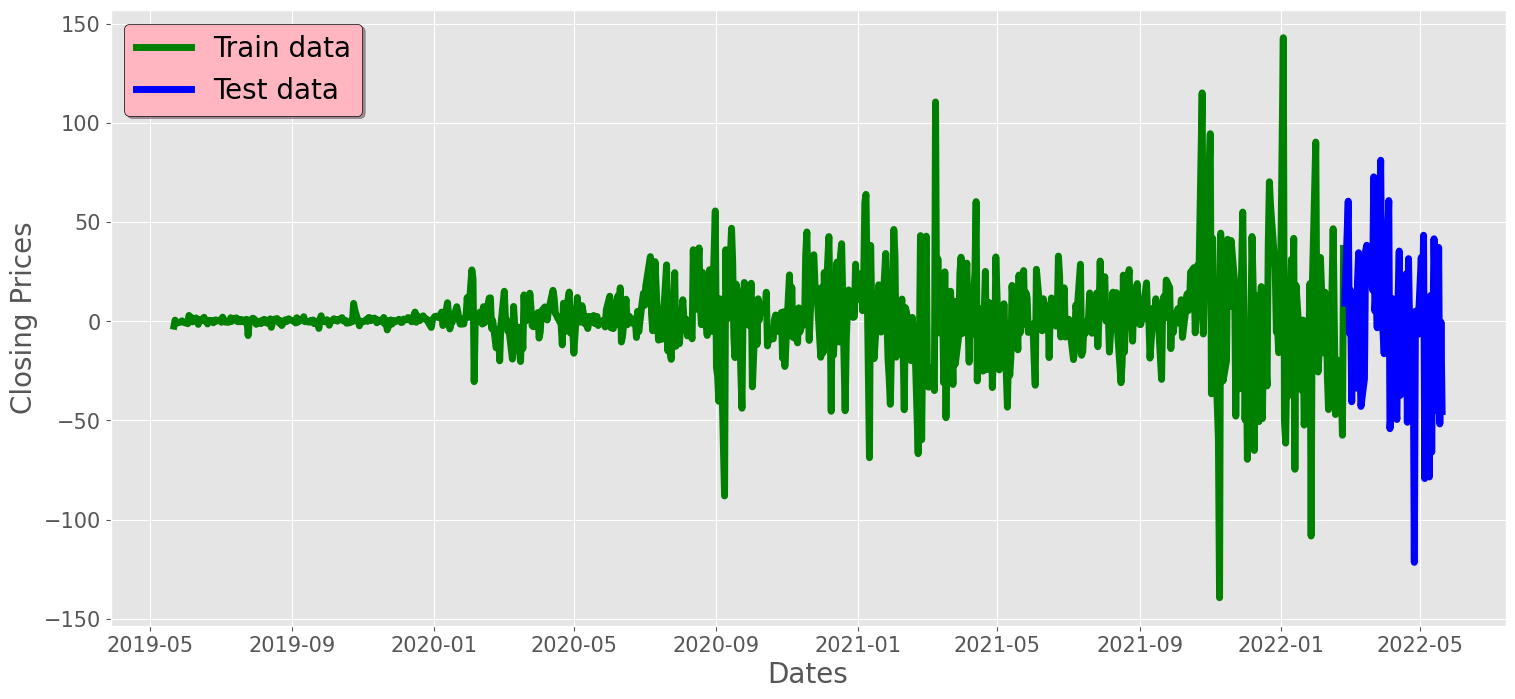

In [41]:
#Split the data into training and test set
train_data = df_close[0:-60]
test_data = df_close[-60:]
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Closing Prices', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.plot(train_data, 'green', label='Train data', linewidth = 5)
plt.plot(test_data, 'blue', label='Test data', linewidth = 5)
plt.legend(fontsize = 20, shadow=True, facecolor='lightpink',edgecolor = 'k')


# Model Building

In [42]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [43]:
history=[x for x in train_data]

In [44]:
history

[-2.4699974060058594,
 0.5519981384277415,
 -0.9720001220703125,
 -0.385997772216804,
 0.23199844360351562,
 -0.3279991149902344,
 -0.61199951171875,
 -1.2380027770996094,
 2.9260025024414062,
 0.5979995727539062,
 1.871997833251946,
 -0.289997100830071,
 1.6759986877441406,
 0.8439979553222656,
 -1.5679969787597656,
 0.9300003051757812,
 0.20199966430664062,
 2.0219993591308594,
 -0.0579986572265625,
 0.3379974365234375,
 -1.36199951171875,
 0.4480018615722656,
 0.3559989929199219,
 -0.7760009765625,
 -0.09799957275390625,
 0.7140007019042969,
 0.12400054931640625,
 0.7419967651367259,
 -0.523998260498054,
 2.0699996948242188,
 -0.3600006103515625,
 -0.5519981384277344,
 -0.055999755859375,
 1.7719993591308665,
 -0.06399917602539773,
 1.2959976196289062,
 1.6840019226074219,
 -0.2239990234375,
 0.4959983825683594,
 -0.26399993896484375,
 0.9280014038085938,
 -0.5,
 0.8979988098144602,
 0.9420013427734304,
 -7.212001800537102,
 -0.15599822998047586,
 1.5459976196289062,
 1.298000335693

ARIMA = Auto Regressioin Integrated Moving Average

In [45]:
model=ARIMA(history,order=(1,1,1)) #here the arguments are p,d,q
#p-auto regression - PACF
#d-Integration - differencing/Non ST or St
#q-Moving average model -ACF

In [46]:
model

In [47]:
model=model.fit()

In [48]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  697
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3148.870
Date:                Wed, 01 Nov 2023   AIC                           6303.741
Time:                        06:30:17   BIC                           6317.377
Sample:                             0   HQIC                          6309.013
                                - 697                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0285      0.025     -1.150      0.250      -0.077       0.020
ma.L1         -0.9991      0.012    -81.341      0.000      -1.023      -0.975
sigma2       493.6006     12.978     38.035      0.000     468.165     519.036
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2092.37
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):              31.85   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
#Forecast predicts the next value after the traing data is over
model.forecast()

array([0.04741687])

In [50]:
model.forecast()[0]

0.04741686925201094

In [ ]:
#model.predict()

In [51]:
test_data[0]

9.0999755859375

In [52]:
mean_squared_error([test_data[0]],model.forecast())

81.94881931903844

In [53]:
np.sqrt(mean_squared_error([test_data[0]],model.forecast()))

9.052558716685489

In [56]:
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)

In [57]:
#Prints all the combinations of pdq
for i in p_values:
  for j in d_values:
    for k in q_values:
      print(i,j,k)

0 0 0
0 0 1
0 0 2
0 1 0
0 1 1
0 1 2
0 2 0
0 2 1
0 2 2
1 0 0
1 0 1
1 0 2
1 1 0
1 1 1
1 1 2
1 2 0
1 2 1
1 2 2
2 0 0
2 0 1
2 0 2
2 1 0
2 1 1
2 1 2
2 2 0
2 2 1
2 2 2


In [54]:
def train_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [58]:
def evaluate_models(dataset, test, p_values, d_values, q_values):
  dataset = dataset.astype('float32')
  best_score, best_cfg = float("inf"), None
  for p in p_values:
    for d in d_values:
      for q in q_values:
        order = (p,d,q)
        try:
          rmse = train_arima_model(dataset, test, order)
          if rmse < best_score:
            best_score, best_cfg = rmse, order
          print('ARIMA%s RMSE=%.3f' % (order,rmse))
        except:
          continue
  print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [59]:
# evaluate parameters
import warnings
warnings.filterwarnings('ignore')
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
evaluate_models(train_data, test_data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=39.610
ARIMA(0, 0, 1) RMSE=39.578
ARIMA(0, 0, 2) RMSE=39.728
ARIMA(0, 1, 0) RMSE=57.835
ARIMA(0, 1, 1) RMSE=39.611
ARIMA(0, 1, 2) RMSE=39.580
ARIMA(0, 2, 0) RMSE=104.683
ARIMA(0, 2, 1) RMSE=57.876
ARIMA(0, 2, 2) RMSE=39.615
ARIMA(1, 0, 0) RMSE=39.570
ARIMA(1, 0, 1) RMSE=39.636
ARIMA(1, 0, 2) RMSE=40.047
ARIMA(1, 1, 0) RMSE=46.184
ARIMA(1, 1, 1) RMSE=39.573
ARIMA(1, 1, 2) RMSE=39.731
ARIMA(1, 2, 0) RMSE=68.740
ARIMA(1, 2, 1) RMSE=46.221
ARIMA(1, 2, 2) RMSE=39.529
ARIMA(2, 0, 0) RMSE=39.746
ARIMA(2, 0, 1) RMSE=39.884
ARIMA(2, 0, 2) RMSE=40.100
ARIMA(2, 1, 0) RMSE=45.781
ARIMA(2, 1, 1) RMSE=39.738
ARIMA(2, 1, 2) RMSE=39.732
ARIMA(2, 2, 0) RMSE=63.008
ARIMA(2, 2, 1) RMSE=45.809
Best ARIMA(1, 2, 2) RMSE=39.529


In [60]:
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = ARIMA(history,order=(1,2,2))
    model_fit = model.fit()
    fc = model_fit.forecast(alpha = 0.05) #Here the alpha is nothing but confidence interval
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of ARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of ARIMA Model: 39.55330316069596


In [62]:
test_data

Date
2022-02-25      9.099976
2022-02-28     60.559998
2022-03-01     -6.059998
2022-03-02     15.520020
2022-03-03    -40.600037
2022-03-04     -1.000000
2022-03-07    -33.709961
2022-03-08     19.820007
2022-03-09     34.569946
2022-03-10    -20.669983
2022-03-11    -42.950012
2022-03-14    -28.979980
2022-03-15     35.520020
2022-03-16     38.339966
2022-03-17     31.369995
2022-03-18     33.790039
2022-03-21     15.769958
2022-03-22     72.820007
2022-03-23      5.130005
2022-03-24     14.809998
2022-03-25     -3.279968
2022-03-28     81.199951
2022-03-29      7.729980
2022-03-30     -5.579956
2022-03-31    -16.390015
2022-04-01      6.989990
2022-04-04     60.859985
2022-04-05    -54.189941
2022-04-06    -45.500000
2022-04-07     11.500000
2022-04-08    -31.770020
2022-04-11    -49.559998
2022-04-12     11.020020
2022-04-13     35.419983
2022-04-14    -37.369995
2022-04-18     19.289978
2022-04-19     23.860046
2022-04-20    -50.950012
2022-04-21     31.580017
2022-04-22     -3.73

In [63]:
predictions

[array([-0.55108614]),
 array([0.07755132]),
 array([0.18903679]),
 array([0.68647729]),
 array([0.74125238]),
 array([1.39365829]),
 array([0.42218117]),
 array([1.11434834]),
 array([-0.2308054]),
 array([-0.47113055]),
 array([0.86165214]),
 array([1.05954639]),
 array([0.5235609]),
 array([-0.73161957]),
 array([0.4569213]),
 array([-0.29960968]),
 array([0.69534062]),
 array([1.38383822]),
 array([1.51731743]),
 array([1.58514355]),
 array([1.68555092]),
 array([1.83431445]),
 array([-0.43372143]),
 array([1.88928795]),
 array([2.2606025]),
 array([1.78439267]),
 array([2.18198215]),
 array([3.98266009]),
 array([2.9139693]),
 array([2.44124031]),
 array([1.4320345]),
 array([2.14896813]),
 array([1.44698689]),
 array([1.38275552]),
 array([1.04406942]),
 array([1.23518155]),
 array([1.25268106]),
 array([0.85247372]),
 array([1.04422063]),
 array([1.10986222]),
 array([1.58779521]),
 array([1.08101825]),
 array([2.24898361]),
 array([0.05805498]),
 array([0.74639759]),
 array([0.

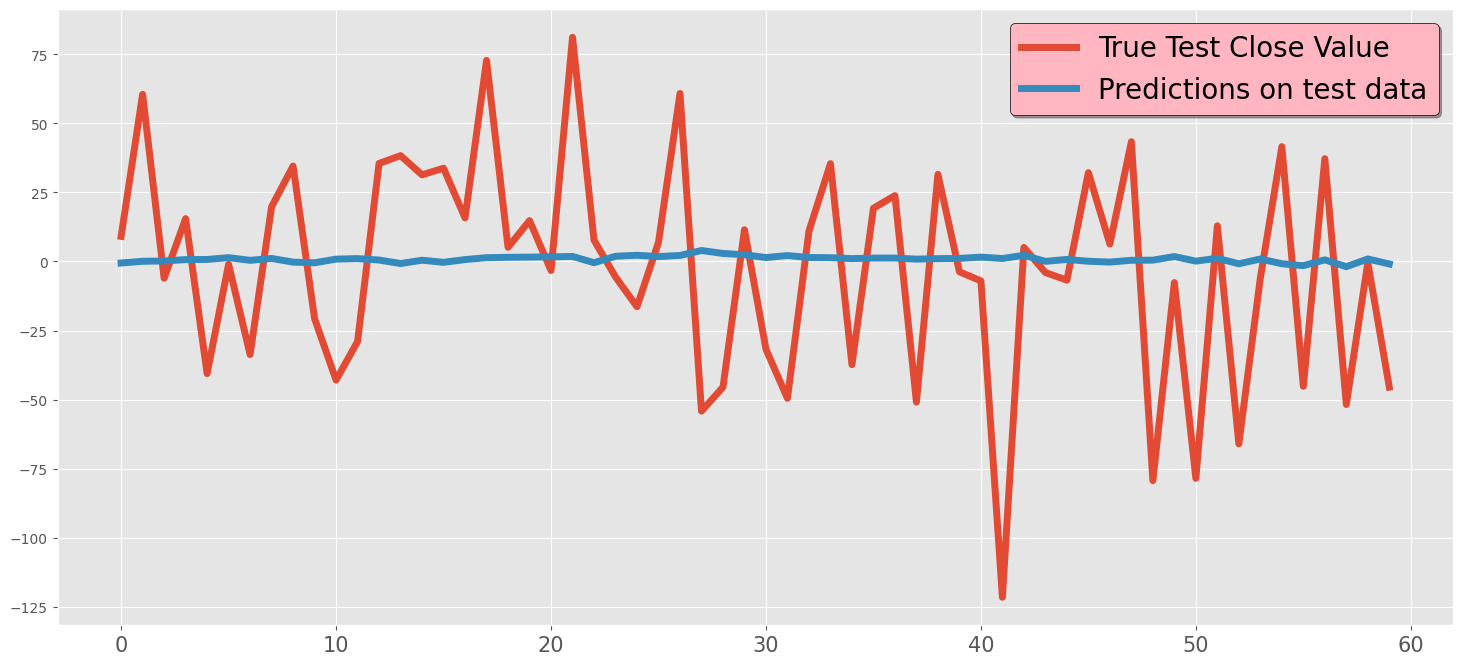

In [61]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

In [64]:
fc_series = pd.Series(predictions, index=test_data.index)

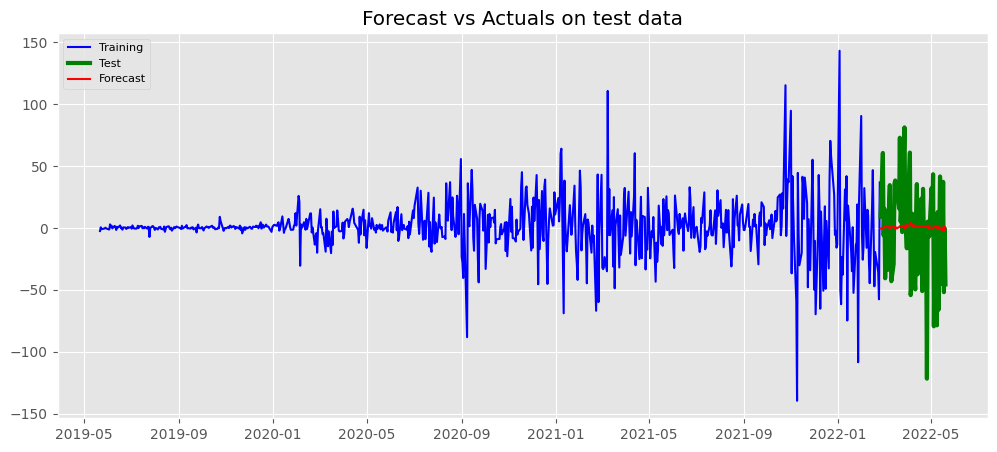

In [65]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='Training', color = 'blue')
plt.plot(test_data, label='Test', color = 'green', linewidth = 3)
plt.plot(fc_series, label='Forecast', color = 'red')
plt.title('Forecast vs Actuals on test data')
plt.legend(loc='upper left', fontsize=8)
plt.show()

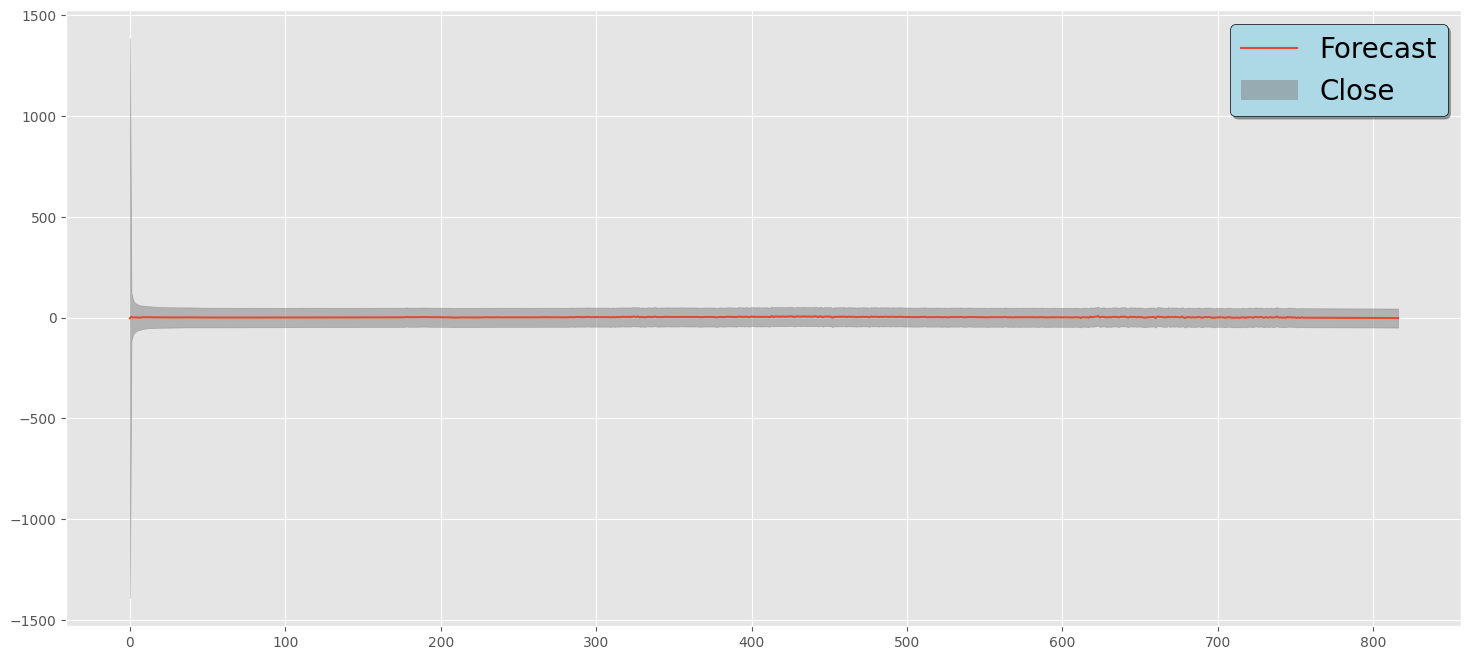

In [66]:
from statsmodels.graphics.tsaplots import plot_predict
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
plot_predict(result=model_fit,start=1, end=len(df_close)+60, ax = ax1)
plt.grid("both")
plt.legend(['Forecast','Close','95% confidence interval'],fontsize = 20, shadow=True,facecolor='lightblue',edgecolor = 'k')
plt.show()

In [67]:
#SARIMAX Model
# evaluate parameters
import warnings
warnings.filterwarnings('ignore')
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = sm.tsa.statespace.SARIMAX(history, order = (0,1,0), seasonal_order = (1,1,1,3))
    model_fit = model.fit()
    fc = model_fit.forecast()
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of SARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of SARIMA Model: 57.86925258260208


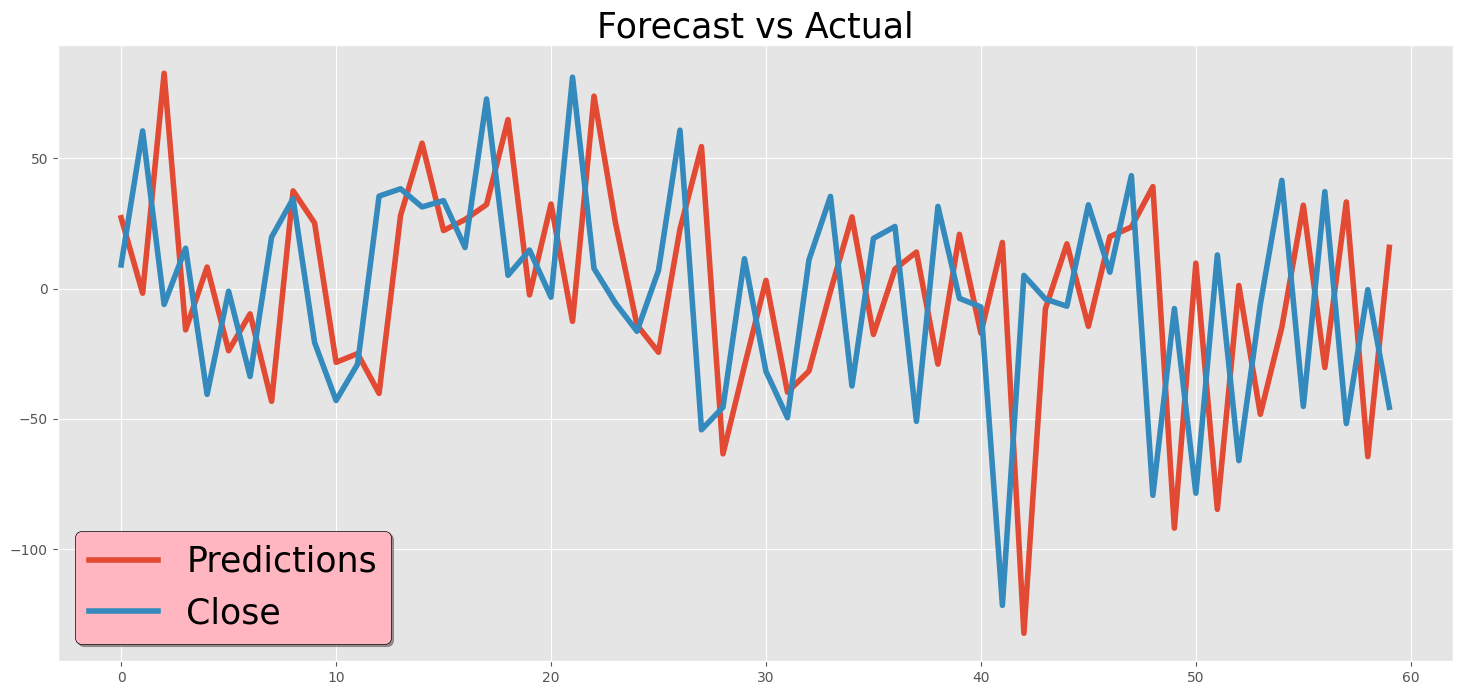

In [68]:
plt.figure(figsize=(18,8))
plt.title('Forecast vs Actual', fontsize = 25)
plt.plot(range(60), predictions, label = 'Predictions', linewidth = 4)
plt.plot(range(60), test_data, label = 'Close', linewidth = 4)
plt.legend(fontsize = 25, shadow=True,facecolor='lightpink',edgecolor = 'k')